In [ ]:
# Instructions
# Your task is to explore the IMDB Movie Dataset, which includes columns like Series_Title, Released_Year, Certificate, Runtime, Genre, IMDB_Rating, Meta_score, Director, Stars, No_of_votes, and Gross.

# Load and Inspect Data:

# Use pandas to load the IMDB Movie Dataset.
# Inspect the data to understand its structure and contents.
# Data Preprocessing:

# Handle missing values and convert data types as needed.
# Rating Trends Over Years:

# Create a line plot with Matplotlib showing trends in IMDB_Rating over the years.
# Genre Popularity Analysis:

# Generate a Seaborn bar plot to compare the number of movies across different genres.
# Director’s Impact on Ratings:

# Use a Matplotlib scatter plot to examine the relationship between directors and movie ratings.
# Star Power Analysis:

# Employ a Seaborn pairplot to explore relationships involving Stars and their impact on IMDB_Rating and Gross.
# Box Plot of Genres vs. Ratings:

# Visualize the distribution of IMDB_Rating across different Genres using a Seaborn box plot.
# Correlation Heatmap:

# Create a heatmap using Seaborn to identify correlations between numerical columns like IMDB_Rating, Meta_score, No_of_votes, and Gross.

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("imdb_top_1000.csv")

# Basic inspection
print(df.head())
print("\nInfo:\n")
print(df.info())
print("\nMissing values:\n")
print(df.isnull().sum())

                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                         

In [2]:
# Convert Released_Year to numeric
df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors="coerce")

# Convert Runtime to numeric (remove ' min')
df["Runtime"] = df["Runtime"].str.replace(" min", "")
df["Runtime"] = pd.to_numeric(df["Runtime"], errors="coerce")

# Convert Gross to numeric (remove commas)
df["Gross"] = df["Gross"].str.replace(",", "")
df["Gross"] = pd.to_numeric(df["Gross"], errors="coerce")

# Handle missing values
df["Meta_score"].fillna(df["Meta_score"].median(), inplace=True)
df["Gross"].fillna(df["Gross"].median(), inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  999 non-null    float64
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   int64  
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     1000 non-null   float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          1000 non-null   float64
dtypes: float64(4), int64(2), object(10)
memory usage: 125.1+ KB
None


/tmp/ipython-input-4067720361.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Meta_score"].fillna(df["Meta_score"].median(), inplace=True)
/tmp/ipython-input-4067720361.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

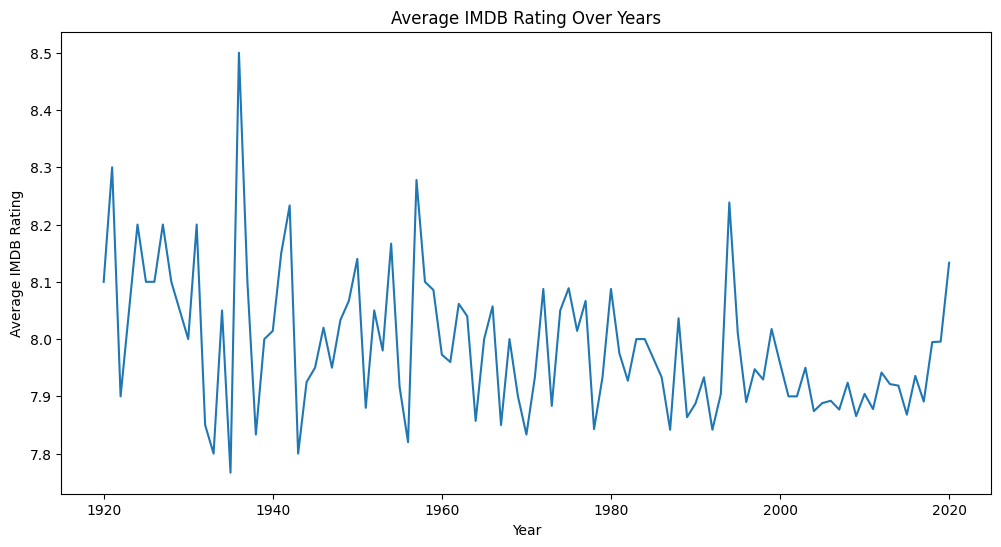

In [3]:
import matplotlib.pyplot as plt

# Drop missing year
df = df.dropna(subset=["Released_Year"])

# Group by year
yearly_ratings = df.groupby("Released_Year")["IMDB_Rating"].mean()

plt.figure(figsize=(12,6))

plt.plot(yearly_ratings.index, yearly_ratings.values)

plt.title("Average IMDB Rating Over Years")
plt.xlabel("Year")
plt.ylabel("Average IMDB Rating")

plt.show()

/tmp/ipython-input-2066140921.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


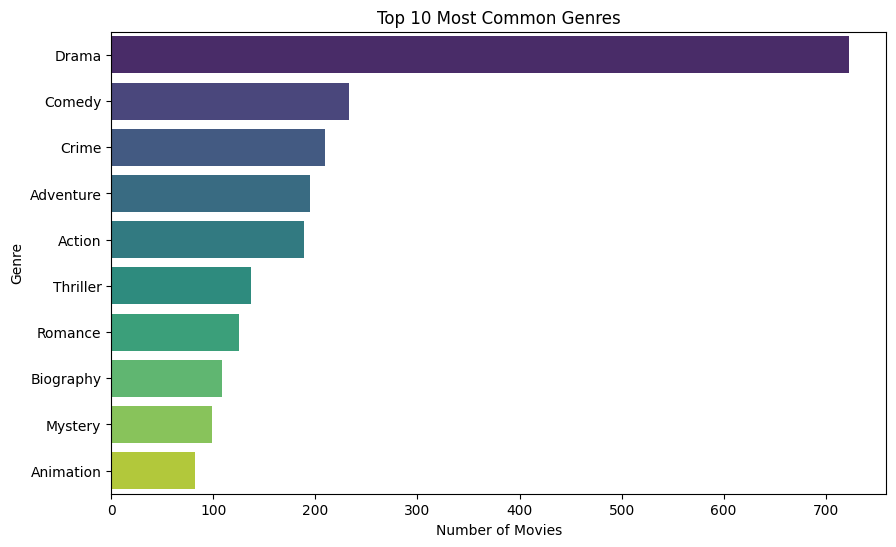

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Split genres
genre_series = df["Genre"].str.split(", ", expand=True).stack()

# Count genres
genre_counts = genre_series.value_counts().head(10)

plt.figure(figsize=(10,6))

sns.barplot(
    x=genre_counts.values,
    y=genre_counts.index,
    palette="viridis"
)

plt.title("Top 10 Most Common Genres")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")

plt.show()

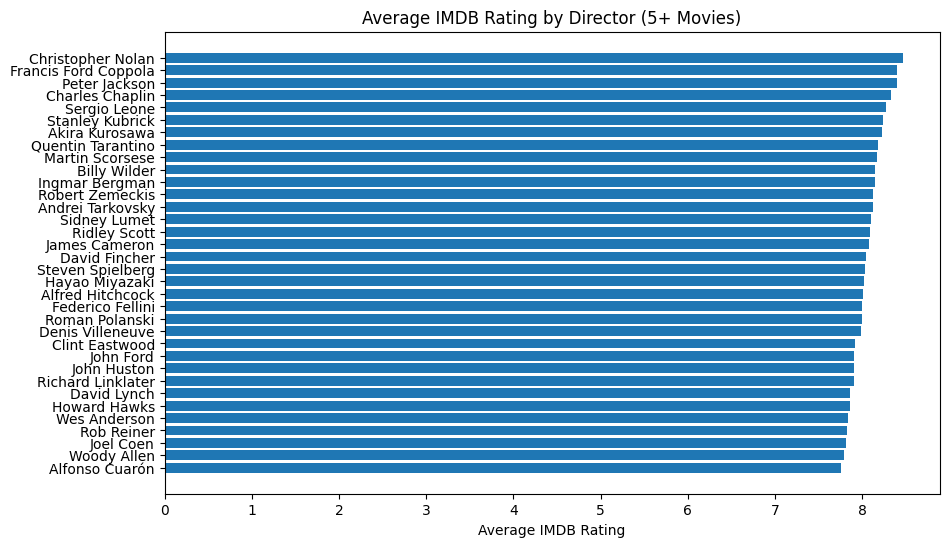

In [6]:
# Average rating per director (only directors with 5+ movies)
director_avg = (
    filtered_df.groupby("Director")["IMDB_Rating"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))

plt.barh(director_avg.index, director_avg.values)

plt.gca().invert_yaxis()
plt.title("Average IMDB Rating by Director (5+ Movies)")
plt.xlabel("Average IMDB Rating")

plt.show()

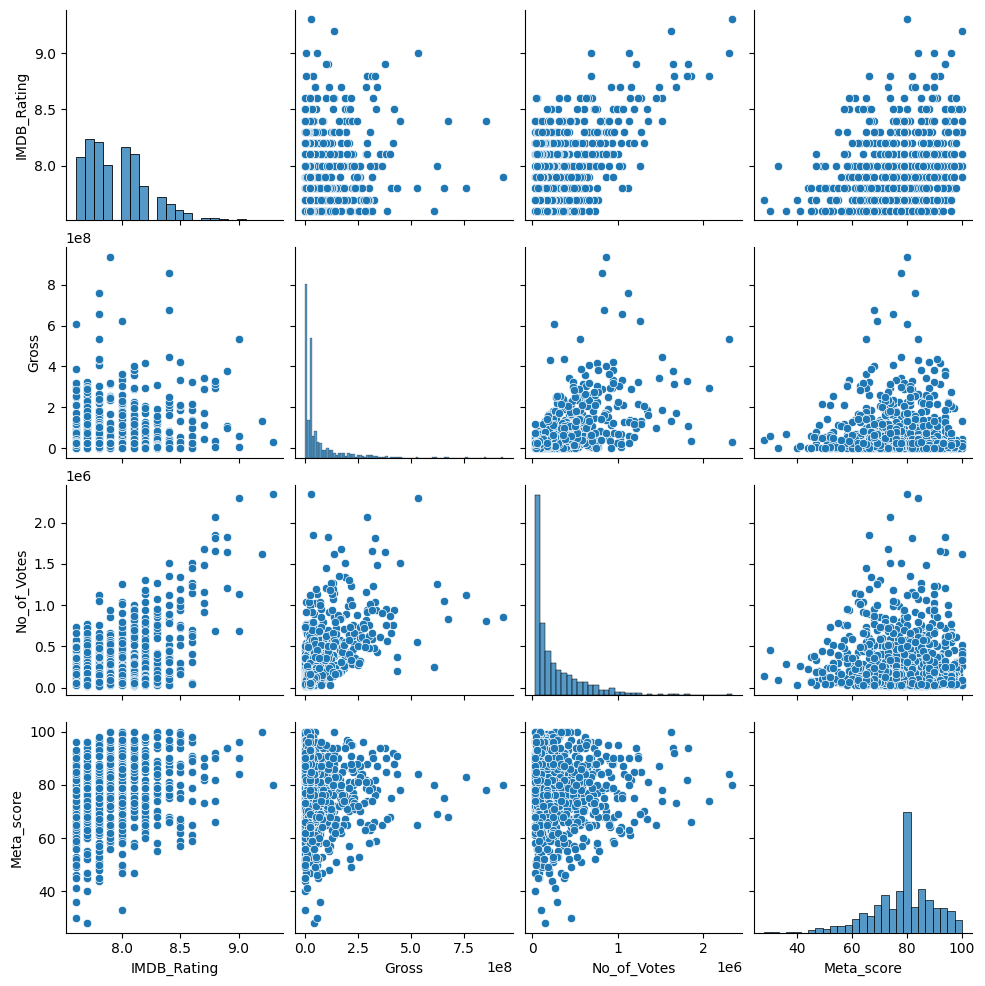

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df[["IMDB_Rating", "Gross", "No_of_Votes", "Meta_score"]]

sns.pairplot(numeric_cols, diag_kind="hist")

plt.show()

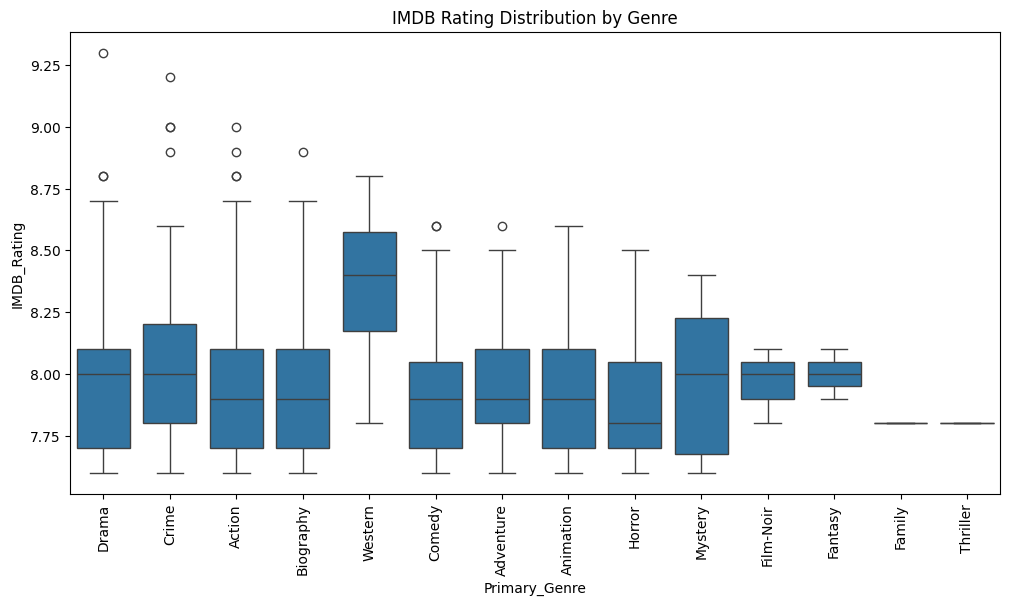

In [8]:
# Use only first listed genre for simplicity
df["Primary_Genre"] = df["Genre"].str.split(",").str[0]

plt.figure(figsize=(12,6))

sns.boxplot(
    data=df,
    x="Primary_Genre",
    y="IMDB_Rating"
)

plt.xticks(rotation=90)
plt.title("IMDB Rating Distribution by Genre")
plt.show()

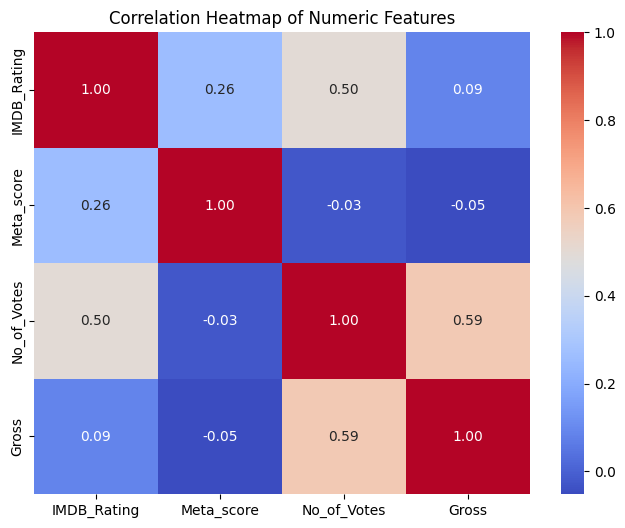

In [9]:
plt.figure(figsize=(8,6))

corr = df[["IMDB_Rating", "Meta_score", "No_of_Votes", "Gross"]].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

plt.title("Correlation Heatmap of Numeric Features")
plt.show()